In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE , SVMSMOTE, BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preprocessing

In [4]:
#loading the dataset
df=pd.read_csv('/content/drive/MyDrive/ML_Tugas1/indian_liver_patient.csv')

In [5]:
#dataset showing the top five rows and last five rows
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
# replacing missing values with mean
df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [7]:
#label encoding and scaling
from sklearn.preprocessing import LabelEncoder, RobustScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.Gender.head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [8]:
#Data Balancing(Resample)
from sklearn.utils import resample
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [9]:
# Split data on majority(1) and minority(2)
minority = df[df.Dataset==2]
majority = df[df.Dataset==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 11)
Majority size: (416, 11)


In [10]:
# choosing upsample
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 11)


In [87]:
#correlation table
df.corr().style.background_gradient(cmap='plasma')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.002048,0.034399,0.033412,0.087698,-0.052784,-0.000227,-0.219257,-0.286712,-0.208075,-0.183538
Gender,0.002048,1.000000,0.106744,0.119627,0.018150,0.088535,0.089567,-0.066606,-0.097618,-0.032845,-0.148567
Total_Bilirubin,0.034399,0.106744,1.000000,0.880411,0.224764,0.234568,0.257212,-0.049193,-0.223616,-0.192216,-0.287418
Direct_Bilirubin,0.033412,0.119627,0.880411,1.000000,0.253451,0.255660,0.277807,-0.045310,-0.231595,-0.188845,-0.320386
Alkaline_Phosphotase,0.087698,0.018150,0.224764,0.253451,1.000000,0.149490,0.184245,-0.054548,-0.183642,-0.233963,-0.248364
Alamine_Aminotransferase,-0.052784,0.088535,0.234568,0.255660,0.149490,1.000000,0.794514,-0.056071,-0.046941,-0.011708,-0.217381
Aspartate_Aminotransferase,-0.000227,0.089567,0.257212,0.277807,0.184245,0.794514,1.000000,-0.047590,-0.098327,-0.072607,-0.200187
Total_Protiens,-0.219257,-0.066606,-0.049193,-0.045310,-0.054548,-0.056071,-0.047590,1.000000,0.798025,0.258358,0.126830
Albumin,-0.286712,-0.097618,-0.223616,-0.231595,-0.183642,-0.046941,-0.098327,0.798025,1.000000,0.707622,0.226471
Albumin_and_Globulin_Ratio,-0.208075,-0.032845,-0.192216,-0.188845,-0.233963,-0.011708,-0.072607,0.258358,0.707622,1.000000,0.170987


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Dataset', axis=1), df['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train values shape: (665, 10)
Test values shape: (167, 10)
Train target shape: (665,)
Test target shape: (167,)


[0.10507623 0.02903433 0.12637089 0.13103812 0.11630591 0.1108919
 0.11046818 0.09148271 0.09226064 0.08707109]


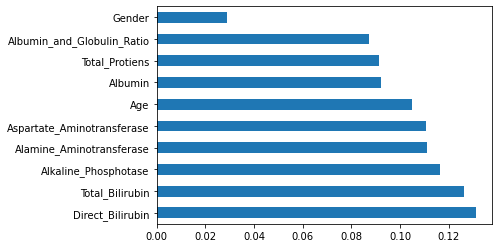

In [44]:
import pandas as pd
import numpy as np
X = X_train  #independent columns
y = y_train    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Top Ranking 1

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
df1 = df.filter(['Direct_Bilirubin','Dataset'])
df1.head()

,Direct_Bilirubin,Dataset
131,0.2,2
223,0.3,2
107,0.2,2
540,0.2,2
578,0.1,2


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Dataset', axis=1), df1['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 1)
Test values shape: (167, 1)
Train target shape: (665,)
Test target shape: (167,)


In [47]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.12382865 0.15627813 0.13731074 0.12893939 0.14650416 0.13068247
 0.36200953 0.46608496 0.31228638 0.33146763]
Score Time = 
 [0.0034771  0.00345254 0.00340581 0.00339985 0.00342822 0.00345516
 0.00546551 0.00596499 0.00572801 0.00573945]
Test Score = 
 [0.67164179 0.76119403 0.6119403  0.71641791 0.71641791 0.6969697
 0.65151515 0.56060606 0.71212121 0.77272727]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.82      0.48      0.60       332
           2       0.63      0.89      0.74       333

    accuracy                           0.69       665
   macro avg       0.73      0.69      0.67       665
weighted avg       0.72      0.69      0.67       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.76

#Top 2

In [48]:
df2 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Dataset'])
df2.head()

,Direct_Bilirubin,Total_Bilirubin,Dataset
131,0.2,0.7,2
223,0.3,1.1,2
107,0.2,0.8,2
540,0.2,0.8,2
578,0.1,0.5,2


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Dataset', axis=1), df2['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 2)
Test values shape: (167, 2)
Train target shape: (665,)
Test target shape: (167,)


In [50]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.16888428 0.24323249 0.18754792 0.20307803 0.18332434 0.20374727
 0.1630919  0.20675588 0.20060372 0.20832705]
Score Time = 
 [0.00326633 0.00335407 0.00320315 0.00343037 0.00344706 0.00323296
 0.00316238 0.00328231 0.00336123 0.00345254]
Test Score = 
 [0.73134328 0.71641791 0.6119403  0.70149254 0.76119403 0.72727273
 0.62121212 0.54545455 0.74242424 0.83333333]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.52      0.64       332
           2       0.65      0.90      0.76       333

    accuracy                           0.71       665
   macro avg       0.75      0.71      0.70       665
weighted avg       0.75      0.71      0.70       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.7

#Top 3

In [51]:

df3 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Dataset'])
df3.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Dataset
131,0.2,0.7,237,2
223,0.3,1.1,175,2
107,0.2,0.8,158,2
540,0.2,0.8,114,2
578,0.1,0.5,500,2


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Dataset', axis=1), df3['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 3)
Test values shape: (167, 3)
Train target shape: (665,)
Test target shape: (167,)


In [54]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.08242583 0.07662201 0.07789183 0.08419251 0.08486915 0.07817364
 0.07687783 0.07654381 0.09080505 0.08159494]
Score Time = 
 [0.00359368 0.00353861 0.00354528 0.0034945  0.00353599 0.00348544
 0.00365138 0.00345373 0.00356126 0.00359726]
Test Score = 
 [0.8358209  0.82089552 0.82089552 0.85074627 0.79104478 0.84848485
 0.77272727 0.72727273 0.89393939 0.86363636]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.99      0.92      0.95       332
           2       0.92      0.99      0.96       333

    accuracy                           0.95       665
   macro avg       0.96      0.95      0.95       665
weighted avg       0.96      0.95      0.95       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.9

#Top 4

In [55]:

df4 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Dataset'])
df4.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Dataset
131,0.2,0.7,237,18,2
223,0.3,1.1,175,20,2
107,0.2,0.8,158,29,2
540,0.2,0.8,114,21,2
578,0.1,0.5,500,20,2


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4.drop('Dataset', axis=1), df4['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 4)
Test values shape: (167, 4)
Train target shape: (665,)
Test target shape: (167,)


In [59]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.09220004 0.07613826 0.0742867  0.07550788 0.08961463 0.07527113
 0.08282709 0.07152224 0.08601069 0.11691141]
Score Time = 
 [0.00352788 0.00348663 0.00356936 0.00348902 0.00342011 0.00348806
 0.00348687 0.00371504 0.00615454 0.0036099 ]
Test Score = 
 [0.94029851 0.91044776 0.92537313 0.94029851 0.88059701 0.93939394
 0.90909091 0.90909091 0.95454545 0.86363636]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.8

#Top 5

In [67]:

df5 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Dataset'])
df5.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Dataset
131,0.2,0.7,237,18,28,2
223,0.3,1.1,175,20,19,2
107,0.2,0.8,158,29,39,2
540,0.2,0.8,114,21,23,2
578,0.1,0.5,500,20,34,2


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df5.drop('Dataset', axis=1), df5['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 5)
Test values shape: (167, 5)
Train target shape: (665,)
Test target shape: (167,)


In [69]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.09255624 0.08169913 0.08966327 0.08506918 0.09831929 0.09172702
 0.08076596 0.09736466 0.08576179 0.08550167]
Score Time = 
 [0.0035429  0.00470257 0.00402093 0.00416589 0.00364566 0.00391102
 0.00366974 0.00383568 0.00453806 0.00357985]
Test Score = 
 [0.95522388 0.92537313 0.94029851 0.95522388 0.88059701 0.90909091
 0.92424242 0.92424242 0.95454545 0.87878788]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.8

#Top 6

In [70]:

df6 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Age','Dataset'])
df6.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Age,Dataset
131,0.2,0.7,237,18,28,70,2
223,0.3,1.1,175,20,19,50,2
107,0.2,0.8,158,29,39,36,2
540,0.2,0.8,114,21,23,42,2
578,0.1,0.5,500,20,34,60,2


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df6.drop('Dataset', axis=1), df6['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 6)
Test values shape: (167, 6)
Train target shape: (665,)
Test target shape: (167,)


In [72]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.09756708 0.0809238  0.08735085 0.08654261 0.08399796 0.08211851
 0.10354972 0.08260775 0.09103131 0.08368111]
Score Time = 
 [0.00366592 0.00410342 0.0039537  0.0036664  0.00409985 0.00348449
 0.00415874 0.00410986 0.00383949 0.00407815]
Test Score = 
 [0.95522388 0.92537313 0.94029851 0.95522388 0.88059701 0.90909091
 0.92424242 0.92424242 0.95454545 0.87878788]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.8

#Top 7

In [73]:

df7 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Age','Albumin','Dataset'])
df7.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Age,Albumin,Dataset
131,0.2,0.7,237,18,28,70,2.5,2
223,0.3,1.1,175,20,19,50,4.5,2
107,0.2,0.8,158,29,39,36,2.2,2
540,0.2,0.8,114,21,23,42,3.0,2
578,0.1,0.5,500,20,34,60,1.6,2


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df7.drop('Dataset', axis=1), df7['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 7)
Test values shape: (167, 7)
Train target shape: (665,)
Test target shape: (167,)


In [76]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.09947062 0.09438658 0.1019876  0.0895524  0.0911839  0.0940733
 0.08495951 0.08322096 0.10014701 0.09068227]
Score Time = 
 [0.00410843 0.00500083 0.00462079 0.00419784 0.00410461 0.0040338
 0.00369763 0.00359607 0.00386667 0.00439811]
Test Score = 
 [0.95522388 0.92537313 0.94029851 0.95522388 0.88059701 0.90909091
 0.92424242 0.92424242 0.95454545 0.87878788]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86 

#Top 8

In [77]:

df8 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Age','Albumin','Total_Protiens','Dataset'])
df8.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Age,Albumin,Total_Protiens,Dataset
131,0.2,0.7,237,18,28,70,2.5,5.8,2
223,0.3,1.1,175,20,19,50,4.5,7.1,2
107,0.2,0.8,158,29,39,36,2.2,6.0,2
540,0.2,0.8,114,21,23,42,3.0,7.0,2
578,0.1,0.5,500,20,34,60,1.6,5.9,2


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df8.drop('Dataset', axis=1), df8['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 8)
Test values shape: (167, 8)
Train target shape: (665,)
Test target shape: (167,)


In [79]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.08838701 0.0953064  0.08741164 0.08567357 0.08804488 0.09322453
 0.08338022 0.08780789 0.08709764 0.10728455]
Score Time = 
 [0.00629139 0.00367689 0.00384736 0.00388455 0.00383735 0.00432086
 0.00598645 0.0039022  0.00399661 0.00448084]
Test Score = 
 [0.95522388 0.92537313 0.94029851 0.95522388 0.88059701 0.90909091
 0.92424242 0.92424242 0.95454545 0.87878788]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.8

#Top 9

In [80]:

df9 = df.filter(['Direct_Bilirubin','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Age','Albumin','Total_Protiens','Albumin_and_Globulin_Ratio','Dataset'])
df9.head()

,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Age,Albumin,Total_Protiens,Albumin_and_Globulin_Ratio,Dataset
131,0.2,0.7,237,18,28,70,2.5,5.8,0.75,2
223,0.3,1.1,175,20,19,50,4.5,7.1,1.70,2
107,0.2,0.8,158,29,39,36,2.2,6.0,0.50,2
540,0.2,0.8,114,21,23,42,3.0,7.0,0.70,2
578,0.1,0.5,500,20,34,60,1.6,5.9,0.37,2


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df9.drop('Dataset', axis=1), df9['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 9)
Test values shape: (167, 9)
Train target shape: (665,)
Test target shape: (167,)


In [82]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.17219257 0.16205049 0.09029508 0.0817616  0.08270764 0.08512783
 0.09010792 0.08047342 0.10021949 0.09958863]
Score Time = 
 [0.00862288 0.00389194 0.0036571  0.00446749 0.00380278 0.00364566
 0.00390887 0.0036025  0.0038569  0.0064919 ]
Test Score = 
 [0.95522388 0.92537313 0.94029851 0.95522388 0.88059701 0.90909091
 0.92424242 0.92424242 0.95454545 0.87878788]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.8

#Top 10

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Dataset', axis=1), df['Dataset'], test_size=0.20, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (665, 10)
Test values shape: (167, 10)
Train target shape: (665,)
Test target shape: (167,)


In [84]:
# Support Vector Machines
model = model = SVC(C=100,gamma=1, kernel="rbf", probability=True)
SVC_CrossVal = cross_validate(model, X_train, y_train, cv=KFold(10))
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)


print('Cross Validation Result N=10')
print('Fit Time = \n',SVC_CrossVal['fit_time'])
print('Score Time = \n',SVC_CrossVal['score_time'])
print('Test Score = \n',SVC_CrossVal['test_score'])
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('-------------------------------------------------------')
print('Roc_auc score')
print('-------------------------------------------------------')
auc_rf = roc_auc_score(y_test,y_test_hat)
print(auc_rf)
print('')

Cross Validation Result N=10
Fit Time = 
 [0.10435772 0.08276248 0.08093929 0.08489704 0.08304954 0.0828774
 0.09381485 0.08657956 0.09542012 0.08307242]
Score Time = 
 [0.00370455 0.00367689 0.00363564 0.00361848 0.00365114 0.0035491
 0.00355887 0.00448656 0.00402308 0.0035069 ]
Test Score = 
 [0.95522388 0.92537313 0.94029851 0.95522388 0.88059701 0.90909091
 0.92424242 0.92424242 0.95454545 0.87878788]
SVC(C=100, gamma=1, probability=True)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       333

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86 